***
<span style="font-size:32px; color:rgba(0, 0, 255, 0.5);">Day 2 - Embeddings & Vector Stores/Databases</span>

---

<table style="width: 100%;">
  <tr>
    <td style="background-color: rgba(0, 255, 0, 0.2); text-align: center; font-size: 16px;">
    </td>
  </tr>
</table>

<span style="font-size:24px; color:rgba(0, 0, 0, 0.5);">Embeddings and similarity scores</span>

---
"Modern machine learning thrives on diverse data—images, text, audio, and more. This whitepaper explores the power of embeddings, which transform this heterogeneous data into a unified vector representation for seamless use in various applications.

Why embeddings are important In essence, embeddings are numerical representations of real-world data such as text, speech, image, or videos. They are expressed as low-dimensional vectors where the geometric distances of two vectors in the vector space is a projection of the relationships between the two real-world objects that the vectors represent. In other words they help you with providing compact representations of data of different types, while simultaneously also allowing you to compare two different data objects and tell how similar or different they are on a numerical scale: for example: The word ‘computer’ has a similar meaning to the picture of a computer, as well as the word ’laptop’ but not to the word ‘car’. These low-dimensional numerical representations of real-world data significantly helps efficient large-scale data processing and storage by acting as means of lossy compression of the original data while retaining its important properties."

<b>Authors:</b><br>
Anant Nawalgaria and Xiaoqi Ren

<span style="font-size:18px; color:rgba(0, 0, 0, 0.5);">Resources</span>

---
**Whitepaper**<br>
https://www.kaggle.com/whitepaper-embeddings-and-vector-stores

**Embedding and Vector Stores Podcast**<br>
https://www.youtube.com/watch?v=1CC39K76Nqs

**Embedding and Vector Databases Livestream**<br>
https://www.youtube.com/watch?v=kpRyiJUUFxY

**Get your API key from**<br>
https://aistudio.google.com/app/apikey

**Kaggle**<br>
https://www.kaggle.com/code/markishere/day-2-embeddings-and-similarity-scores

In [2]:
# %pip install google-generativeai

<span style="font-size:18px; color:rgba(0, 0, 0, 0.5);">Libraries</span>

---

In [4]:
import os

from dotenv import load_dotenv

import pandas as pd

import seaborn as sns

import google.generativeai as genai

<span style="font-size:18px; color:rgba(0, 0, 0, 0.5);">Initialize the API</span>

---

In [5]:
# Load API key from .env file
load_dotenv()
api_key = os.getenv("GAI_API_KEY")

# Set up the API key for the genai library
genai.configure(api_key=api_key)

<span style="font-size:18px; color:rgba(0, 0, 0, 0.5);">Explore available models</span>

---

In [6]:
for model in genai.list_models():
  if 'embedContent' in model.supported_generation_methods:
    print(model.name)

models/embedding-001
models/text-embedding-004


<span style="font-size:18px; color:rgba(0, 0, 0, 0.5);">Calculating similarity scores</span>

---
This example embeds some variations on the pangram, The quick brown fox jumps over the lazy dog, including spelling mistakes and shortenings of the phrase. Another pangram and a somewhat unrelated phrase have been included for comparison.

In this task, you are going to use the embeddings to calculate similarity scores, so the task_type for these embeddings is semantic_similarity. Check out the API reference for the full list of tasks.

In [7]:
texts = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick rbown fox jumps over the lazy dog.',
    'teh fast fox jumps over the slow woofer.',
    'a quick brown fox jmps over lazy dog.',
    'brown fox jumping over dog',
    'fox > dog',
    # Alternative pangram for comparison:
    'The five boxing wizards jump quickly.',
    # Unrelated text, also for comparison:
    'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus et hendrerit massa. Sed pulvinar, nisi a lobortis sagittis, neque risus gravida dolor, in porta dui odio vel purus.',
]


response = genai.embed_content(model='models/text-embedding-004',
                               content=texts,
                               task_type='semantic_similarity')

Define a short helper function that will make it easier to display longer embedding texts in our visualisation.

A similarity score of two embedding vectors can be obtained by calculating their inner product. If <b>u</b> is in the first embedding vector, and <b>v</b> the second, this is <b>u<sup><i>T</i></sup>b</b>. As these embedding vectors are normalised to unit length, this is also the cosine similarity.

This score can be computed across all embeddings through the matrix self-multiplication: df @ df.T.

<font color=red><b>Note:</b> that the range from 0.0 (completely dissimilar) to 1.0 (completely similar) is depicted in the heatmap from dark (0.0) to light (1.0).</font>

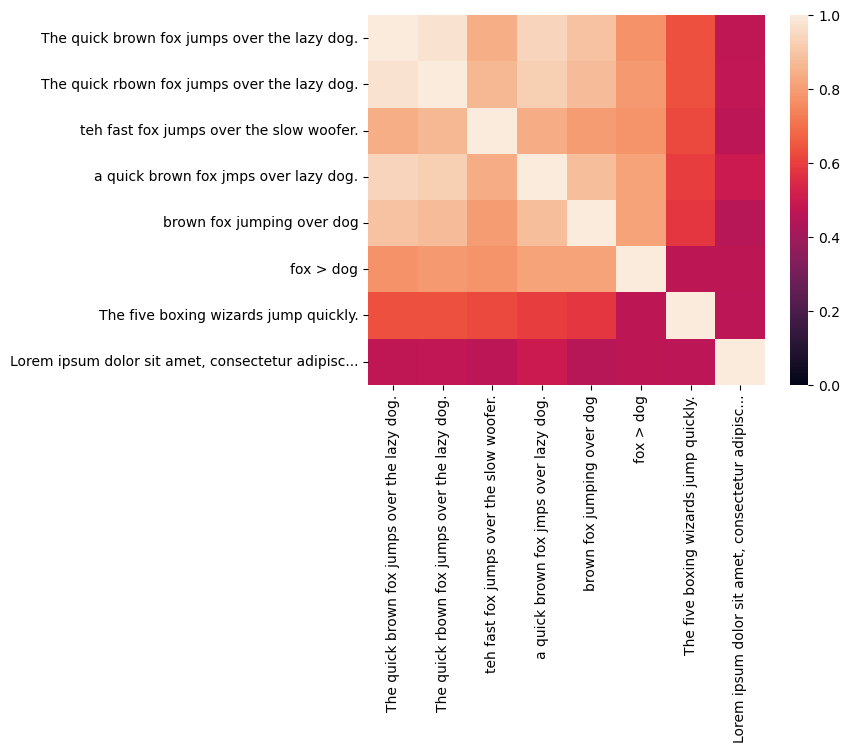

In [9]:
# Set up the embeddings in a dataframe.
df = pd.DataFrame(response['embedding'], index=truncated_texts)
# Perform the similarity calculation
sim = df @ df.T
# Draw!
sns.heatmap(sim, vmin=0, vmax=1);

You can see the scores for a particular term directly by looking it up in the dataframe.

In [10]:
sim['The quick brown fox jumps over the lazy dog.'].sort_values(ascending=False)

The quick brown fox jumps over the lazy dog.          0.999999
The quick rbown fox jumps over the lazy dog.          0.975623
a quick brown fox jmps over lazy dog.                 0.939730
brown fox jumping over dog                            0.894507
teh fast fox jumps over the slow woofer.              0.842152
fox > dog                                             0.776455
The five boxing wizards jump quickly.                 0.635346
Lorem ipsum dolor sit amet, consectetur adipisc...    0.472174
Name: The quick brown fox jumps over the lazy dog., dtype: float64

Try exploring the embeddings of your own datasets, or explore those available in Kaggle datasets.

<span style="font-size:18px; color:rgba(0, 0, 0, 0.5);">Further Reading</span>

---
- Explore <u>[search re-ranking using embeddings](https://github.com/google-gemini/cookbook/blob/main/examples/Search_reranking_using_embeddings.ipynb)</u> with the Wikipedia API<br>
- Perform <u>[anomaly detection using embeddings](https://github.com/google-gemini/cookbook/blob/main/examples/Anomaly_detection_with_embeddings.ipynb)</u>